In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [3]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

n_total = len(param_grid['knn__n_neighbors']) * \
          len(param_grid['knn__weights']) * \
          len(param_grid['knn__metric'])

print(n_total)
print(f"Avec 5 folds : {5 * n_total} entrainements")

42
Avec 5 folds : 210 entrainements


In [4]:
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...lassifier())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'knn__metric': ['euclidean', 'manhattan', ...], 'knn__n_neighbors': [3, 5, ...], 'knn__weights': ['uniform', 'distance']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and para

In [5]:
print(f"Meilleurs parametres: {grid.best_params_}")
print(f"Meilleur score CV:    {grid.best_score_:.4f}")

Meilleurs parametres: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Meilleur score CV:    0.9862


In [6]:
results = pd.DataFrame(grid.cv_results_)

# Top 10
top10 = results.nlargest(10, 'mean_test_score')

print(top10)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
20       0.001677      0.000328         0.001938    5.155878e-04   
21       0.001529      0.000471         0.001617    3.746507e-04   
18       0.001614      0.000199         0.001957    7.835234e-07   
19       0.001541      0.000305         0.001660    4.436336e-04   
22       0.001114      0.000589         0.002680    3.860187e-04   
23       0.001630      0.000530         0.001961    5.805515e-04   
8        0.001803      0.000573         0.002276    2.248481e-04   
10       0.001848      0.000419         0.001942    1.803460e-04   
11       0.001512      0.000417         0.001735    2.267033e-04   
36       0.001471      0.000328         0.002139    3.988140e-04   

   param_knn__metric  param_knn__n_neighbors param_knn__weights  \
20         manhattan                       9            uniform   
21         manhattan                       9           distance   
18         manhattan                       7      

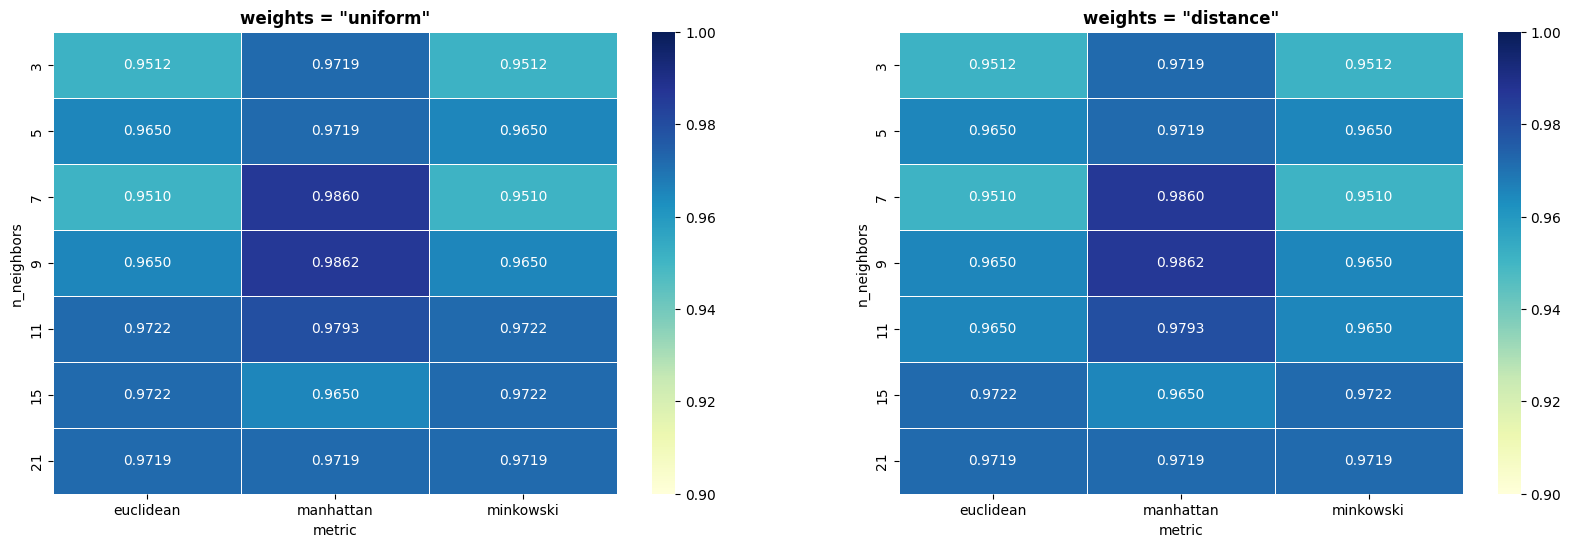

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))


for idx, weight in enumerate(['uniform', 'distance']):
    mask = results['param_knn__weights'] == weight
    pivot = results[mask].pivot_table(
        values='mean_test_score',
        index='param_knn__n_neighbors',
        columns='param_knn__metric',
        aggfunc='mean'
    )
    sns.heatmap(pivot, annot=True, fmt='.4f', cmap='YlGnBu',
                ax=axes[idx], linewidths=0.5, vmin=0.9, vmax=1.0)
    axes[idx].set_title(f'weights = "{weight}"', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('n_neighbors')
    axes[idx].set_xlabel('metric')


In [ ]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        12\n           1       1.00      1.00      1.00        14\n           2       1.00      1.00      1.00        10\n\n    accuracy                           1.00        36\n   macro avg       1.00      1.00      1.00        36\nweighted avg       1.00      1.00      1.00        36\n'